# Complexplorer Tutorial: Plotting Complex Functions

This tutorial will guide you through all the plotting capabilities of complexplorer. You'll learn:

1. **2D Visualizations**: Basic plots, pair plots, and custom layouts
2. **3D Visualizations**: Analytic landscapes and Riemann sphere
3. **Customization**: Working with matplotlib integration
4. **Best Practices**: Tips for creating publication-quality figures

Let's begin by importing the necessary libraries:

In [ ]:
import numpy as np
import complexplorer as cp
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Configure matplotlib for better output
plt.rcParams.update({
    'figure.figsize': (8, 6),
    'figure.dpi': 100,
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Note: For interactive plots in CLI scripts, install PyQt6:
# pip install "complexplorer[qt]"
# Then use cp.ensure_interactive_plots() at the start of your script

## Part 1: Understanding Complex Function Visualization

### Why Visualize Complex Functions?

Complex functions map complex numbers to complex numbers: $f: \mathbb{C} \to \mathbb{C}$. Since both input and output are 2D, we need creative ways to visualize these 4D relationships.

Complexplorer uses **domain coloring**: we color each point in the domain based on the function's output at that point.

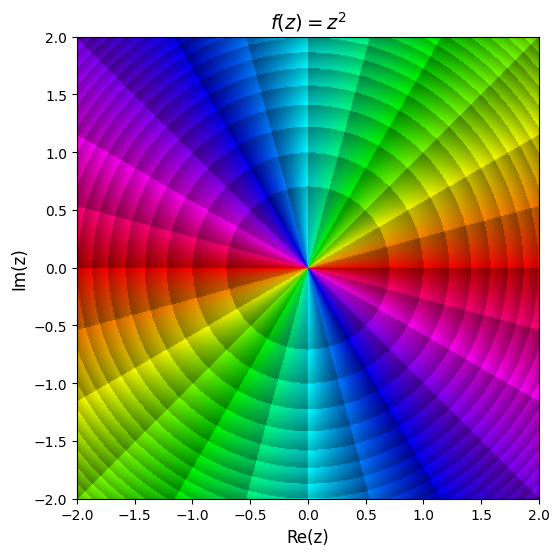

In [2]:
# Let's start with a simple example
domain = cp.Rectangle(4, 4)
f = lambda z: z**2  # squaring function

# Basic plot
plt.figure(figsize=(6, 6))
cp.plot(domain, f)
plt.title(r"$f(z) = z^2$")
plt.show()

# What we see:
# - Colors represent the phase (argument) of f(z)
# - The function has a zero of order 2 at the origin (colors go around twice)
# - The pattern shows how angles are doubled by squaring

### Essential Functions Gallery

Let's visualize some fundamental complex functions to understand their behavior:

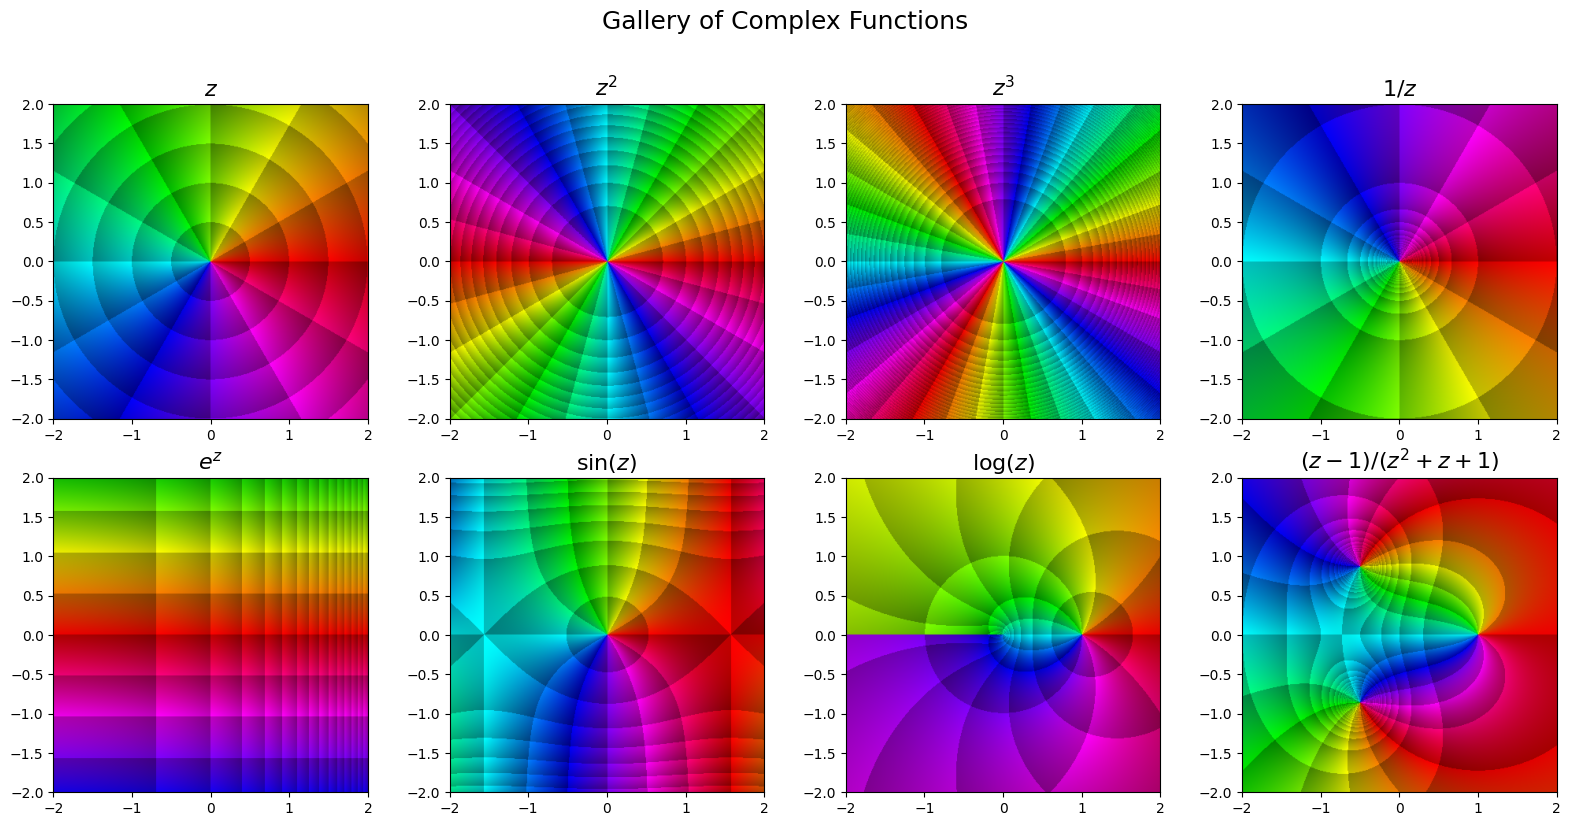

In [3]:
# Define a collection of important functions
functions = {
    r"$z$": lambda z: z,
    r"$z^2$": lambda z: z**2,
    r"$z^3$": lambda z: z**3,
    r"$1/z$": lambda z: 1/z,
    r"$e^z$": lambda z: np.exp(z),
    r"$\sin(z)$": lambda z: np.sin(z),
    r"$\log(z)$": lambda z: np.log(z),
    r"$(z-1)/(z^2+z+1)$": lambda z: (z-1)/(z**2+z+1)
}

# Create a gallery
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for ax, (name, func) in zip(axes, functions.items()):
    cp.plot(domain, func, ax=ax, n=400)
    ax.set_title(name, fontsize=16)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("Gallery of Complex Functions", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## Part 2: 2D Plotting Techniques

### The `plot` Function

The basic `plot` function is your workhorse for single visualizations:

In [ ]:
# Demonstrate different parameters
f = lambda z: (z - 1) / (z**2 + z + 1)  # Our test function

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Basic plot
cp.plot(domain, f, ax=axes[0,0], title="Default settings")

# High resolution
cp.plot(domain, f, ax=axes[0,1], n=400, title="High resolution (n=400)")

# Custom color map with auto-scaling
cp.plot(domain, f, ax=axes[1,0], 
        cmap=cp.Phase(n_phi=12, auto_scale_r=True),
        title="Auto-scaled enhanced phase")

# Different domain
annulus = cp.Annulus(0.5, 2)
cp.plot(annulus, f, ax=axes[1,1], 
        title="Annular domain", n=400)

plt.suptitle("Variations of the plot() function", fontsize=16)
plt.tight_layout()
plt.show()

### The `pair_plot` Function

The `pair_plot` function shows domain and codomain side-by-side, perfect for understanding how functions transform regions:

<Figure size 1200x500 with 0 Axes>

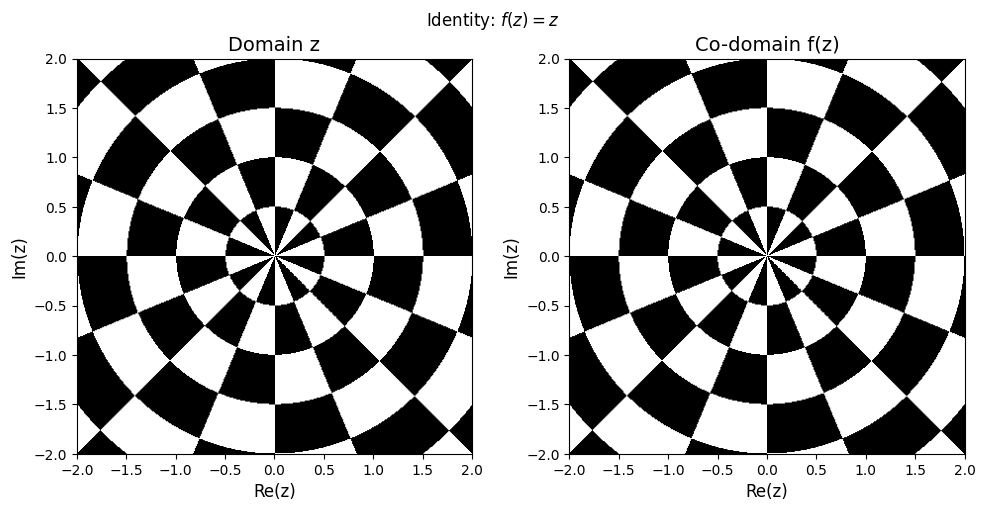

<Figure size 1200x500 with 0 Axes>

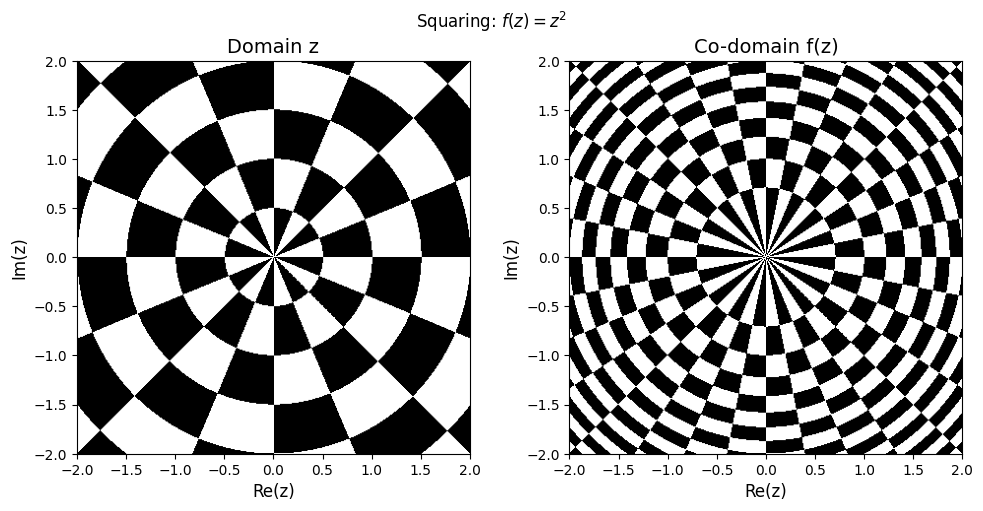

<Figure size 1200x500 with 0 Axes>

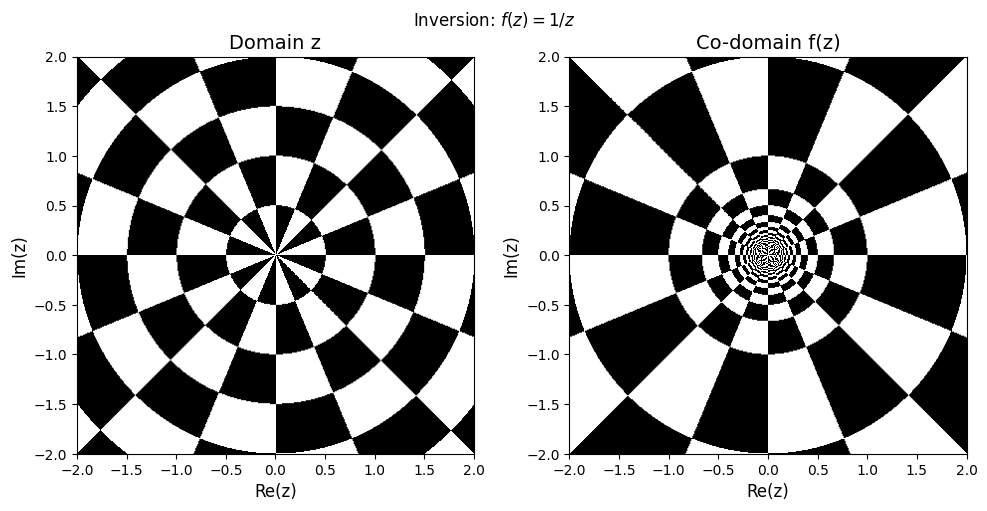

<Figure size 1200x500 with 0 Axes>

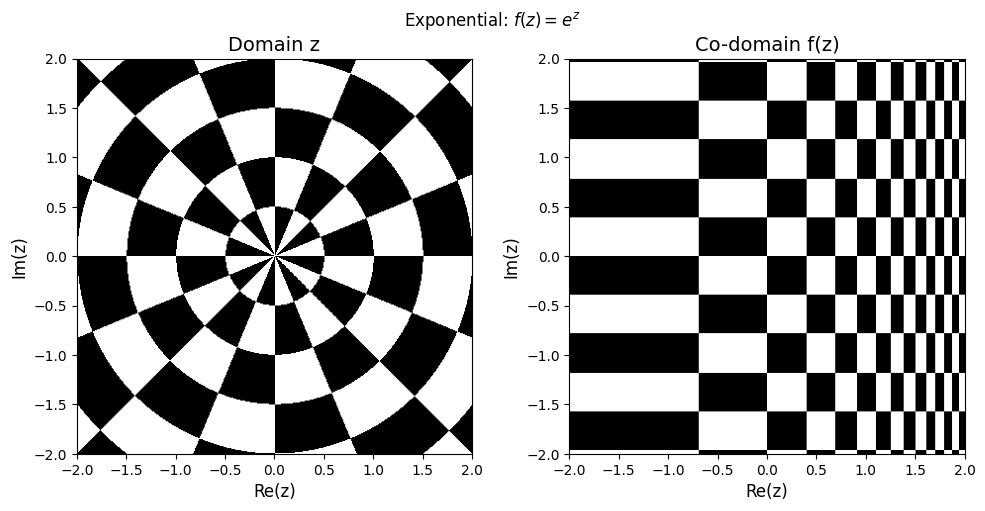

In [5]:
# Compare different functions
functions_to_compare = [
    (lambda z: z, r"Identity: $f(z) = z$"),
    (lambda z: z**2, r"Squaring: $f(z) = z^2$"),
    (lambda z: 1/z, r"Inversion: $f(z) = 1/z$"),
    (lambda z: np.exp(z), r"Exponential: $f(z) = e^z$")
]

for func, title in functions_to_compare:
    plt.figure(figsize=(12, 5))
    cp.pair_plot(domain, func, 
                 cmap=cp.PolarChessboard(n_phi=8, spacing=0.5),
                 title=title, n=400)
    plt.show()

### Working with Arrays

Sometimes you want to plot pre-computed values instead of functions:

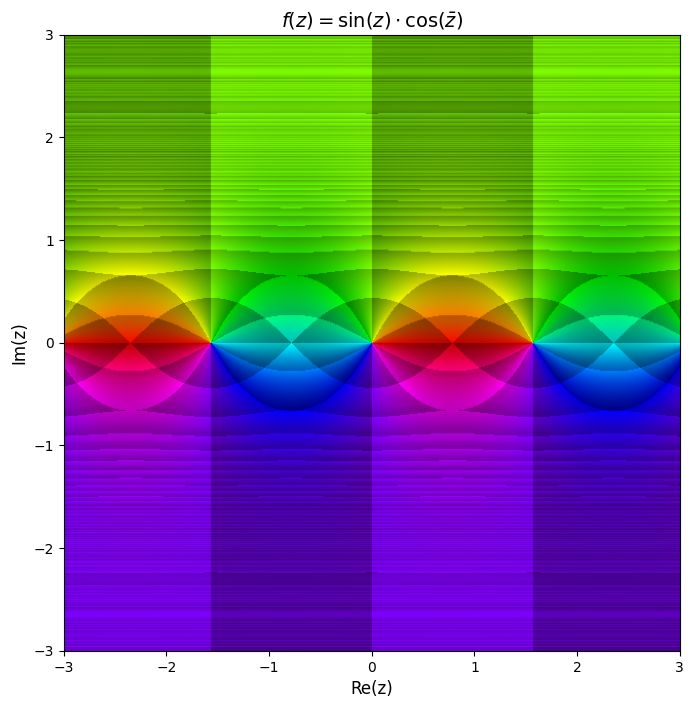

In [6]:
# Create a custom mesh
x = np.linspace(-3, 3, 600)
y = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

# Compute function values
# Let's create an interesting pattern
F = np.sin(Z) * np.cos(Z.conjugate())

# Plot using arrays
plt.figure(figsize=(8, 8))
cp.plot(domain=None, z=Z, f=F)
plt.title(r"$f(z) = \sin(z) \cdot \cos(\bar{z})$")
plt.show()

### Riemann Charts: Seeing the Whole Complex Plane

The Riemann sphere provides a way to visualize functions over the entire extended complex plane:

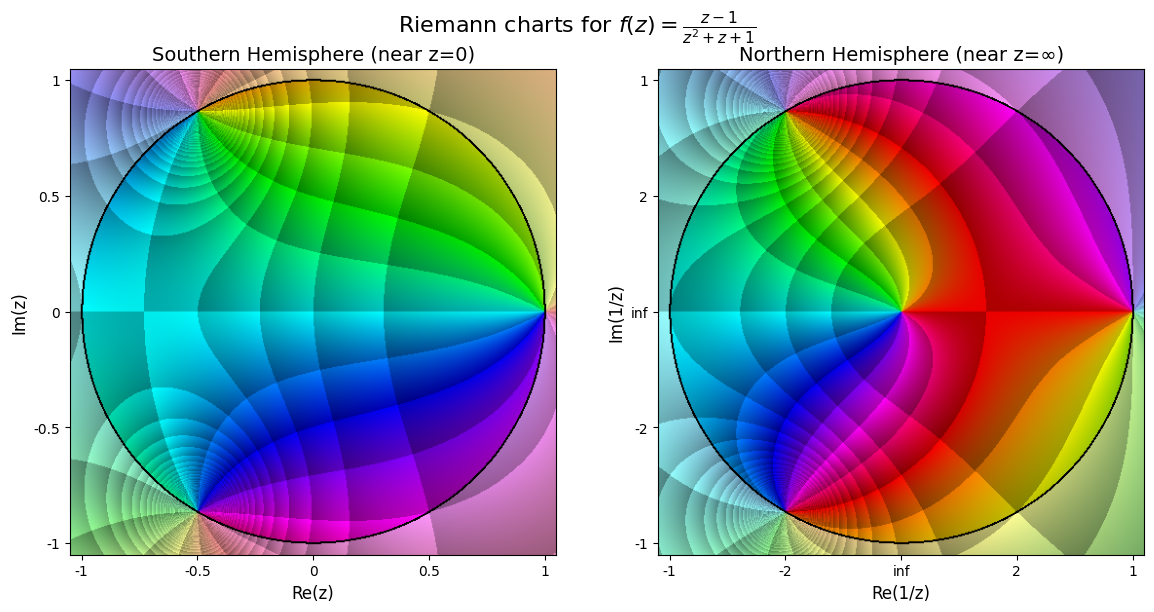

<Figure size 1400x600 with 0 Axes>

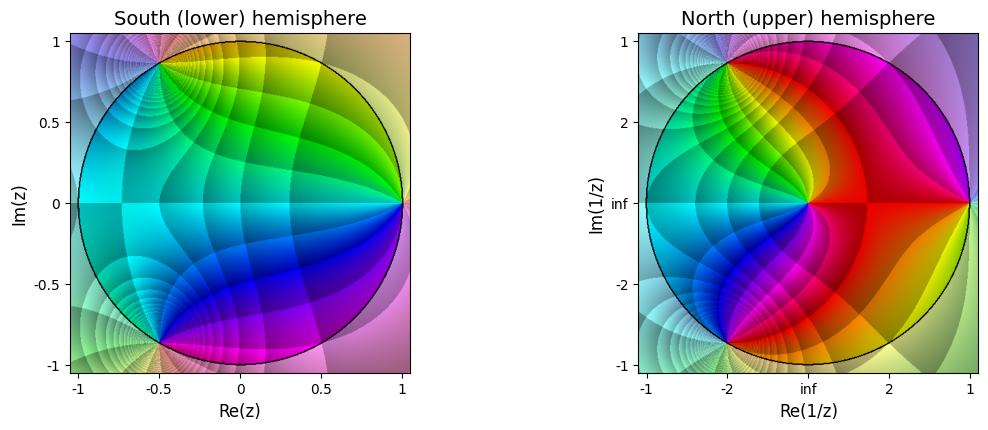

In [7]:
# Single hemisphere view
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Southern hemisphere (around origin)
cp.riemann_chart(f, ax=axes[0], show_south_hemisphere=True, n=500)
axes[0].set_title("Southern Hemisphere (near z=0)")

# Northern hemisphere (around infinity)
cp.riemann_chart(f, ax=axes[1], show_south_hemisphere=False, n=500)
axes[1].set_title("Northern Hemisphere (near z=∞)")

plt.suptitle(r"Riemann charts for $f(z) = \frac{z-1}{z^2+z+1}$", fontsize=16)
plt.tight_layout()
plt.show()

# Both hemispheres together
plt.figure(figsize=(14, 6))
cp.riemann_hemispheres(f, n=500)
plt.show()

## Part 3: 3D Visualizations

### Analytic Landscapes

3D landscapes show the modulus (absolute value) as height, with phase encoded as color:

<Figure size 1000x800 with 0 Axes>

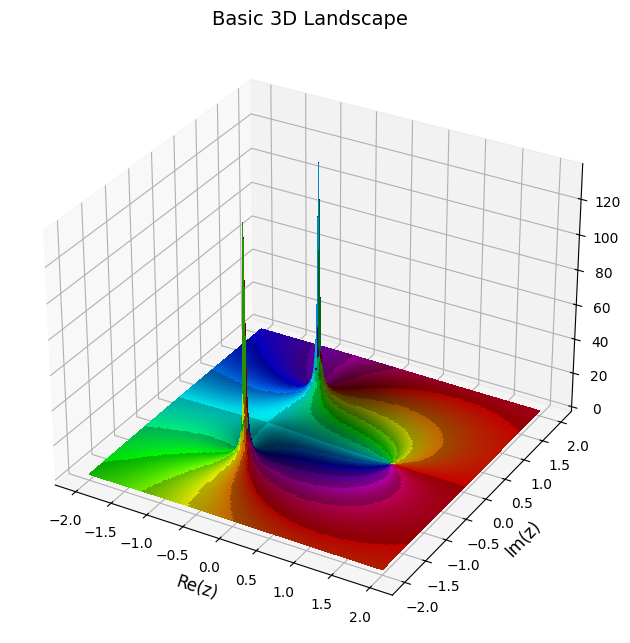

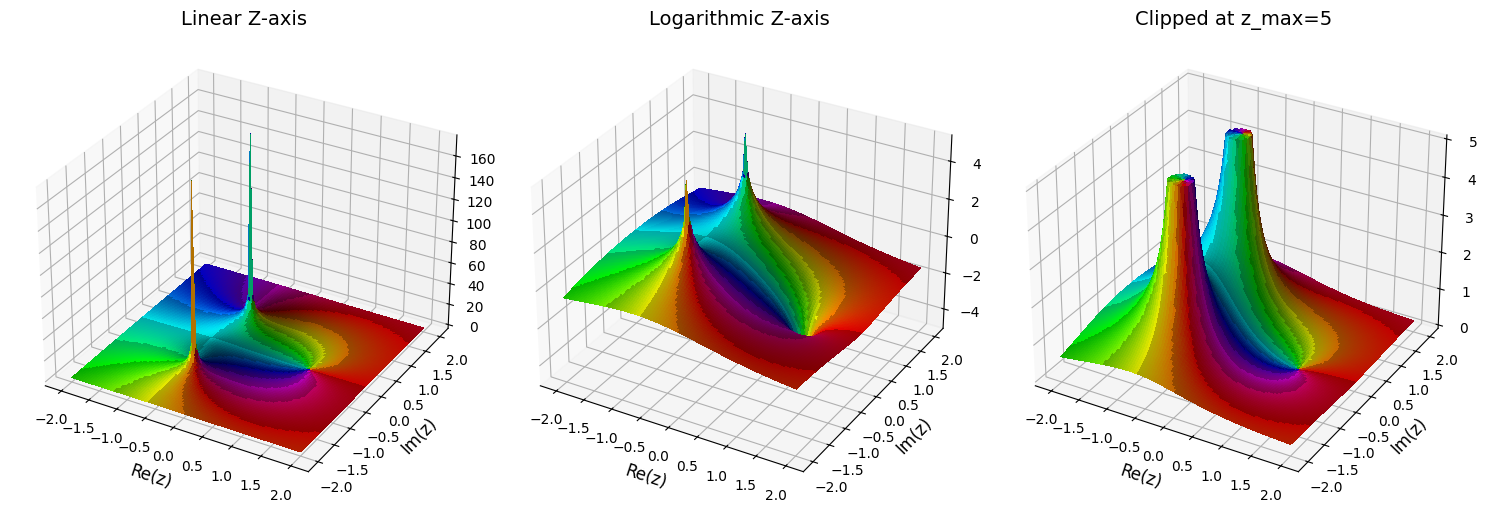

In [8]:
# Basic landscape
plt.figure(figsize=(10, 8))
cp.plot_landscape(domain, func=f, n=150)
plt.title("Basic 3D Landscape")
plt.show()

# Landscape with options
fig = plt.figure(figsize=(15, 5))

# Linear scale
ax1 = fig.add_subplot(131, projection='3d')
cp.plot_landscape(domain, func=f, ax=ax1, n=100)
ax1.set_title("Linear Z-axis")

# Logarithmic scale
ax2 = fig.add_subplot(132, projection='3d')
cp.plot_landscape(domain, func=f, ax=ax2, zaxis_log=True, n=100)
ax2.set_title("Logarithmic Z-axis")

# Clipped height
ax3 = fig.add_subplot(133, projection='3d')
cp.plot_landscape(domain, func=f, ax=ax3, z_max=5, n=100)
ax3.set_title("Clipped at z_max=5")

plt.tight_layout()
plt.show()

### Pair Plot Landscapes

Compare domain and codomain in 3D:

In [ ]:
# Show how different color maps affect 3D visualization
color_maps = [
    (cp.Phase(), "Basic Phase"),
    (cp.Phase(n_phi=6, auto_scale_r=True), "Auto-scaled Enhanced Phase"),
    (cp.PolarChessboard(n_phi=8, r_log=2), "Polar Chessboard"),
    (cp.LogRings(log_spacing=0.3), "Logarithmic Rings")
]

for cmap, name in color_maps:
    plt.figure(figsize=(14, 5))
    cp.pair_plot_landscape(domain, func=f, cmap=cmap, 
                          title=f"3D Landscape with {name}",
                          zaxis_log=True, z_max=10, n=100)
    plt.show()

### The Riemann Sphere

The most comprehensive view of a complex function:

<Figure size 1000x1000 with 0 Axes>

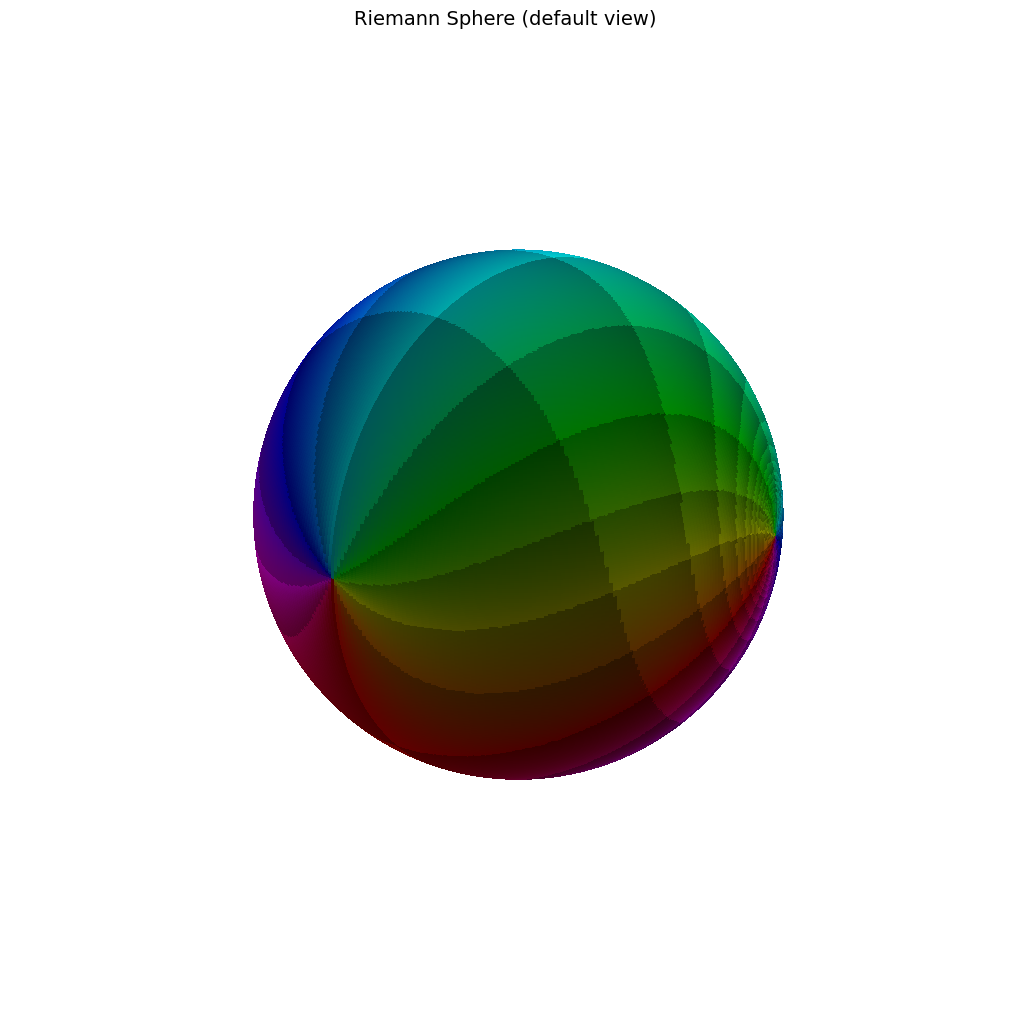

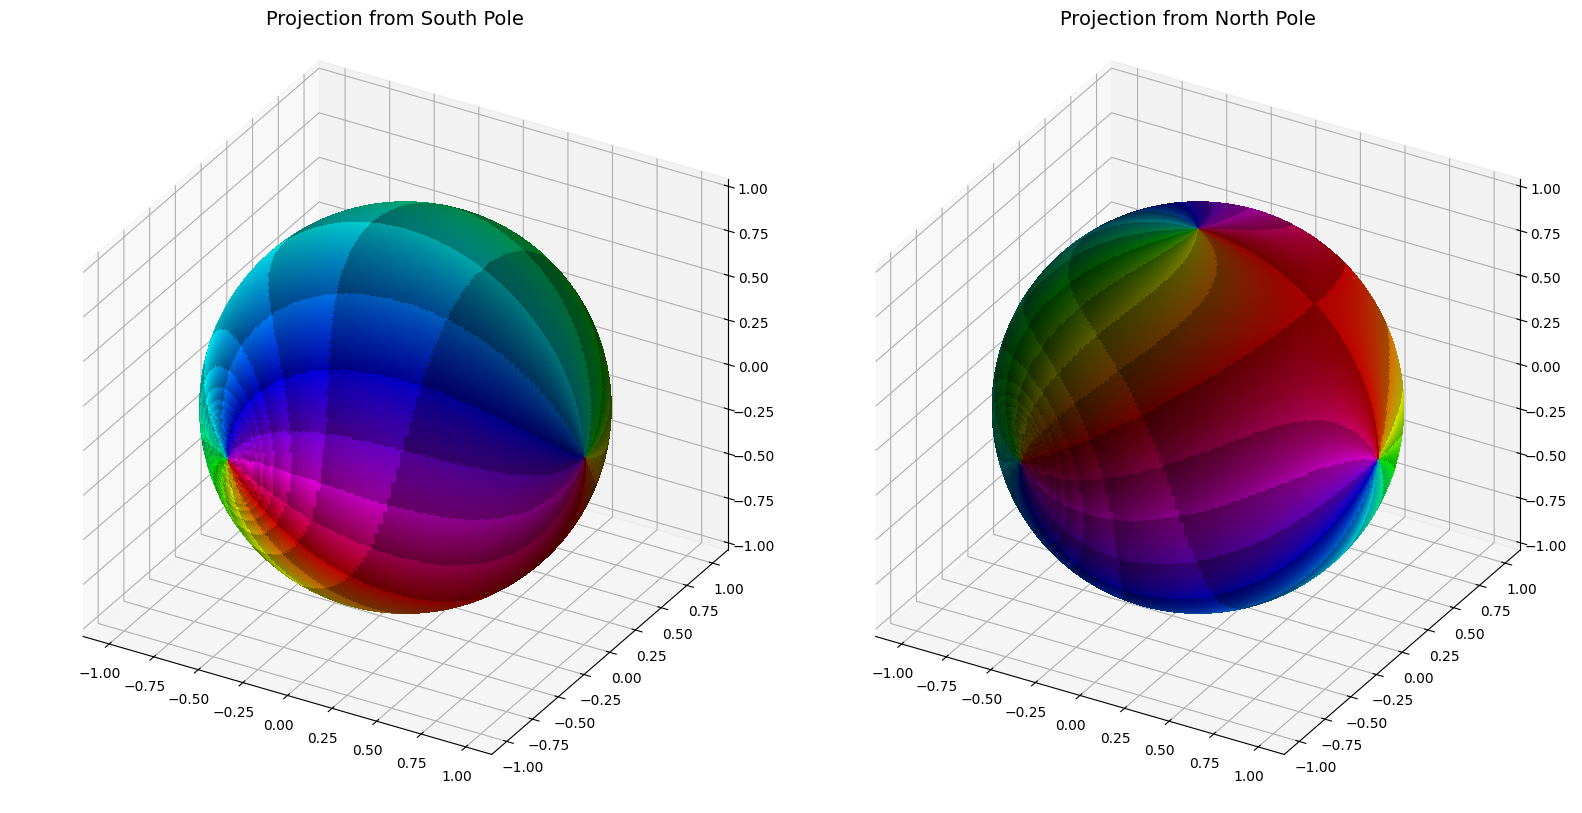

<Figure size 1000x1000 with 0 Axes>

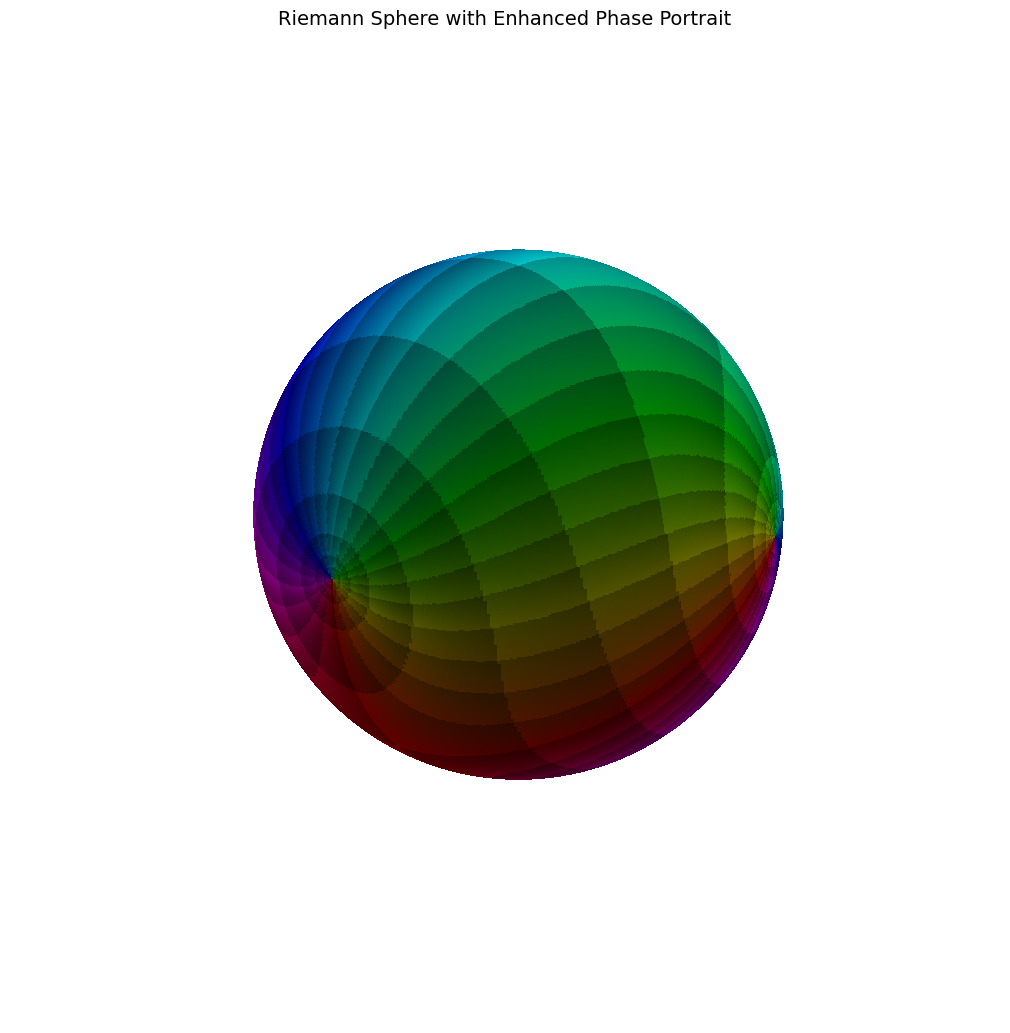

In [10]:
# Basic Riemann sphere
plt.figure(figsize=(10, 10))
cp.riemann(f, n=400)
plt.title("Riemann Sphere (default view)")
plt.show()

# Comparing projection directions
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
cp.riemann(f, ax=ax1, project_from_north=False, n=300)
ax1.set_title("Projection from South Pole")

ax2 = fig.add_subplot(122, projection='3d')
cp.riemann(f, ax=ax2, project_from_north=True, n=300)
ax2.set_title("Projection from North Pole")

plt.tight_layout()
plt.show()

# With custom color map
plt.figure(figsize=(10, 10))
cp.riemann(f, cmap=cp.Phase(n_phi=12, r_log_base=2), n=500)
plt.title("Riemann Sphere with Enhanced Phase Portrait")
plt.show()

## Part 4: Advanced Plotting Techniques

### Custom Layouts with GridSpec

Create complex figure layouts for comprehensive function analysis:

In [ ]:
# Comprehensive function analysis layout
def analyze_function(func, func_name, domain_size=4):
    """Create a comprehensive visualization of a complex function."""
    
    fig = plt.figure(figsize=(18, 12))
    gs = GridSpec(3, 4, figure=fig, hspace=0.3, wspace=0.3)
    
    # Main domain
    main_domain = cp.Rectangle(domain_size, domain_size)
    
    # 1. Basic phase portrait (large)
    ax1 = fig.add_subplot(gs[0:2, 0:2])
    cp.plot(main_domain, func, ax=ax1, n=600)
    ax1.set_title(f"{func_name}\nPhase Portrait", fontsize=14)
    
    # 2. Enhanced phase portrait with auto-scaling
    ax2 = fig.add_subplot(gs[0, 2])
    cp.plot(main_domain, func, ax=ax2, 
            cmap=cp.Phase(n_phi=12, auto_scale_r=True), n=300)
    ax2.set_title("Auto-scaled Enhanced")
    
    # 3. Polar chessboard
    ax3 = fig.add_subplot(gs[0, 3])
    cp.plot(main_domain, func, ax=ax3,
            cmap=cp.PolarChessboard(n_phi=8, r_log=2), n=300)
    ax3.set_title("Polar Chessboard")
    
    # 4. Riemann chart - South
    ax4 = fig.add_subplot(gs[1, 2])
    cp.riemann_chart(func, ax=ax4, show_south_hemisphere=True, n=300)
    ax4.set_title("Near z=0")
    
    # 5. Riemann chart - North
    ax5 = fig.add_subplot(gs[1, 3])
    cp.riemann_chart(func, ax=ax5, show_south_hemisphere=False, n=300)
    ax5.set_title("Near z=∞")
    
    # 6. 3D Landscape
    ax6 = fig.add_subplot(gs[2, 0:2], projection='3d')
    cp.plot_landscape(main_domain, func=func, ax=ax6, 
                      zaxis_log=True, n=300)
    ax6.set_title("3D Landscape (log scale)")
    
    # 7. Riemann sphere
    ax7 = fig.add_subplot(gs[2, 2:], projection='3d')
    cp.riemann(func, ax=ax7, n=200)
    ax7.set_title("Riemann Sphere")
    
    plt.suptitle(f"Comprehensive Analysis: {func_name}", fontsize=16)
    return fig

# Analyze our test function
fig = analyze_function(f, r"$f(z) = \frac{z-1}{z^2+z+1}$")
plt.show()

# Analyze another interesting function
g = lambda z: np.sin(z) / z  # sinc function
fig = analyze_function(g, r"$f(z) = \frac{\sin(z)}{z}$")
plt.show()

### Animating Complex Functions

Create animations to show how functions behave with parameters:

In [ ]:
# Parameter sweep visualization
def visualize_parameter_sweep(param_values, param_name="a"):
    """Show how a function changes with a parameter."""
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    domain = cp.Rectangle(4, 4)
    
    for ax, a in zip(axes, param_values):
        # Function with parameter
        func = lambda z: (z - a) / (z**2 + a*z + 1)
        
        cp.plot(domain, func, ax=ax, 
                cmap=cp.Phase(n_phi=6, auto_scale_r=True),
                n=400)
        ax.set_title(f"{param_name} = {a:.2f}")
    
    plt.suptitle(rf"$f(z) = \frac{{z-{param_name}}}{{z^2+{param_name}z+1}}$ for different {param_name}",
                 fontsize=16)
    plt.tight_layout()
    return fig

# Show parameter evolution
param_values = [-2, -1, 0, 0.5, 1, 2]
fig = visualize_parameter_sweep(param_values)
plt.show()

### Saving Figures

Tips for creating publication-quality figures:

In [ ]:
# High-quality figure for publication
def create_publication_figure(func, title, filename=None):
    """Create a high-quality figure suitable for publication."""
    
    # Use high DPI and specific size
    fig = plt.figure(figsize=(8, 8), dpi=300)
    
    # Create domain and plot with high resolution
    domain = cp.Rectangle(4, 4)
    cp.plot(domain, func, 
            cmap=cp.Phase(n_phi=12, auto_scale_r=True),
            n=800)  # Very high resolution
    
    # Formatting
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel("Re(z)", fontsize=14)
    plt.ylabel("Im(z)", fontsize=14)
    plt.tick_params(labelsize=12)
    
    # Add grid for reference
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Tight layout
    plt.tight_layout()
    
    # Save if filename provided
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Saved to {filename}")
    
    return fig

# Example
fig = create_publication_figure(
    lambda z: (z**4 - 1) / (z**4 + 1),
    r"$f(z) = \frac{z^4 - 1}{z^4 + 1}$"
)
plt.show()

## Part 5: Analyzing Special Functions

### Meromorphic Functions

Functions with poles require special attention:

/tmp/ipykernel_537554/1843505863.py:15: RuntimeWarning: divide by zero encountered in divide
  return numerator / denominator


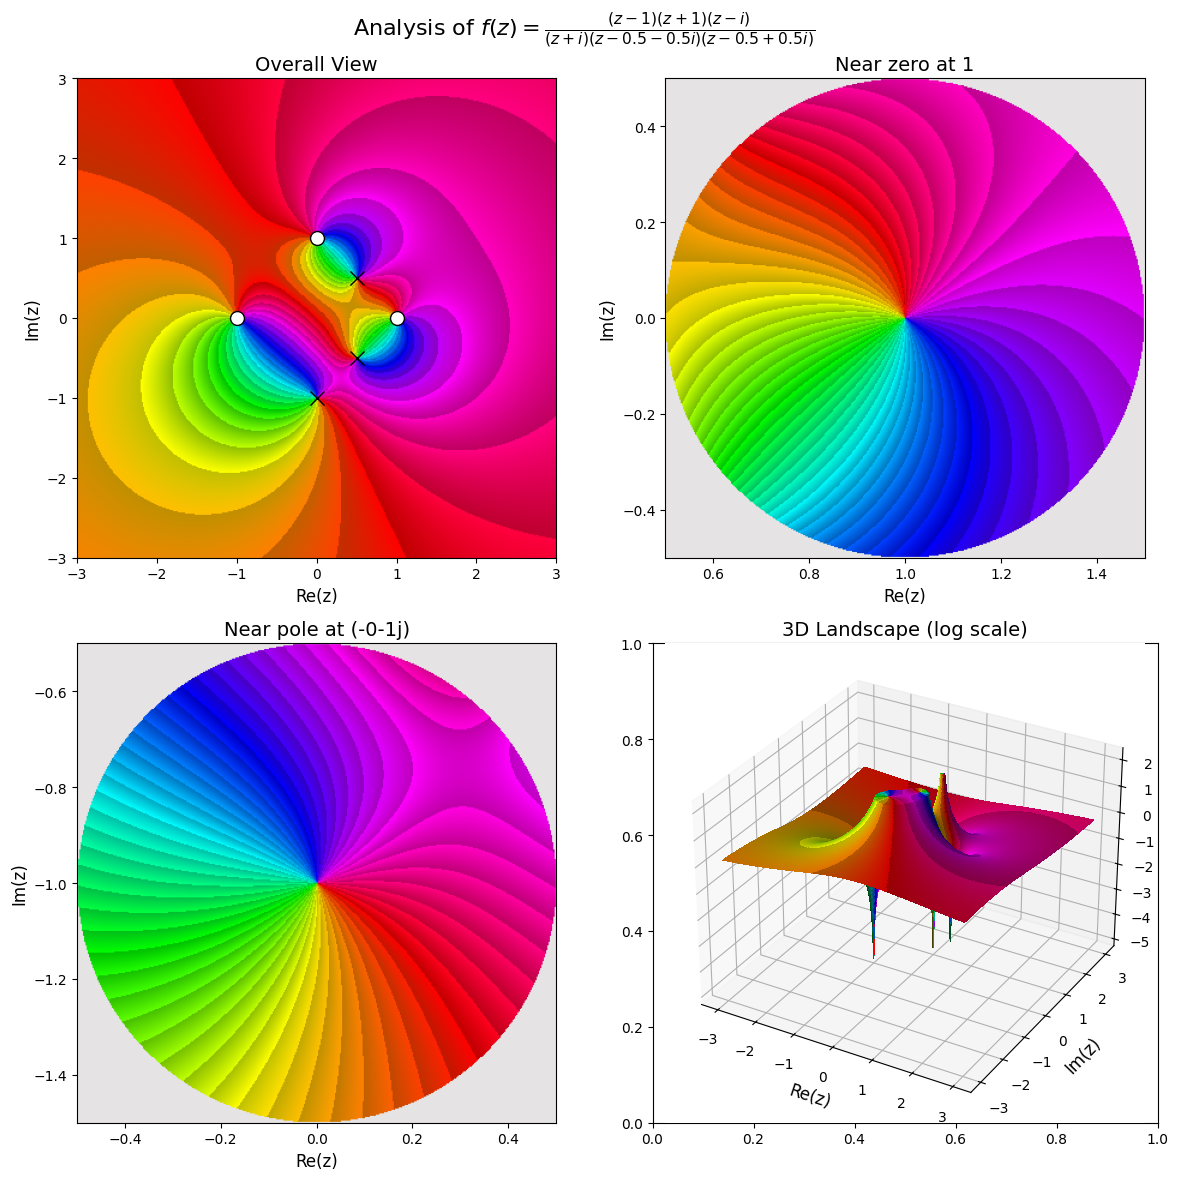

In [14]:
# Analyze a meromorphic function
def analyze_meromorphic(zeros, poles, name="f"):
    """Analyze a meromorphic function given its zeros and poles."""
    
    # Construct the function
    def func(z):
        numerator = np.ones_like(z, dtype=complex)
        for zero in zeros:
            numerator *= (z - zero)
        
        denominator = np.ones_like(z, dtype=complex)
        for pole in poles:
            denominator *= (z - pole)
        
        return numerator / denominator
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    # Overall view
    domain = cp.Rectangle(6, 6)
    cp.plot(domain, func, ax=axes[0,0], 
            cmap=cp.Phase(n_phi=12), n=400)
    axes[0,0].set_title("Overall View")
    
    # Mark zeros and poles
    for zero in zeros:
        axes[0,0].plot(zero.real, zero.imag, 'wo', 
                       markersize=10, markeredgecolor='black')
    for pole in poles:
        axes[0,0].plot(pole.real, pole.imag, 'kx', markersize=10)
    
    # Zoom on a zero
    if zeros:
        zero_domain = cp.Disk(0.5, center=zeros[0])
        cp.plot(zero_domain, func, ax=axes[0,1],
                cmap=cp.Phase(n_phi=24), n=400)
        axes[0,1].set_title(f"Near zero at {zeros[0]}")
    
    # Zoom on a pole
    if poles:
        pole_domain = cp.Disk(0.5, center=poles[0])
        cp.plot(pole_domain, func, ax=axes[1,0],
                cmap=cp.Phase(n_phi=24), n=400)
        axes[1,0].set_title(f"Near pole at {poles[0]}")
    
    # 3D view
    ax_3d = fig.add_subplot(224, projection='3d')
    cp.plot_landscape(domain, func=func, ax=ax_3d,
                      zaxis_log=True, z_max=10, n=400)
    ax_3d.set_title("3D Landscape (log scale)")
    
    plt.suptitle(f"Analysis of {name}", fontsize=16)
    plt.tight_layout()
    return fig

# Example: Rational function
zeros = [1, -1, 1j]
poles = [-1j, 0.5+0.5j, 0.5-0.5j]
fig = analyze_meromorphic(zeros, poles, 
                         name=r"$f(z) = \frac{(z-1)(z+1)(z-i)}{(z+i)(z-0.5-0.5i)(z-0.5+0.5i)}$")
plt.show()

### Essential Singularities

Functions with essential singularities have fascinating behavior:

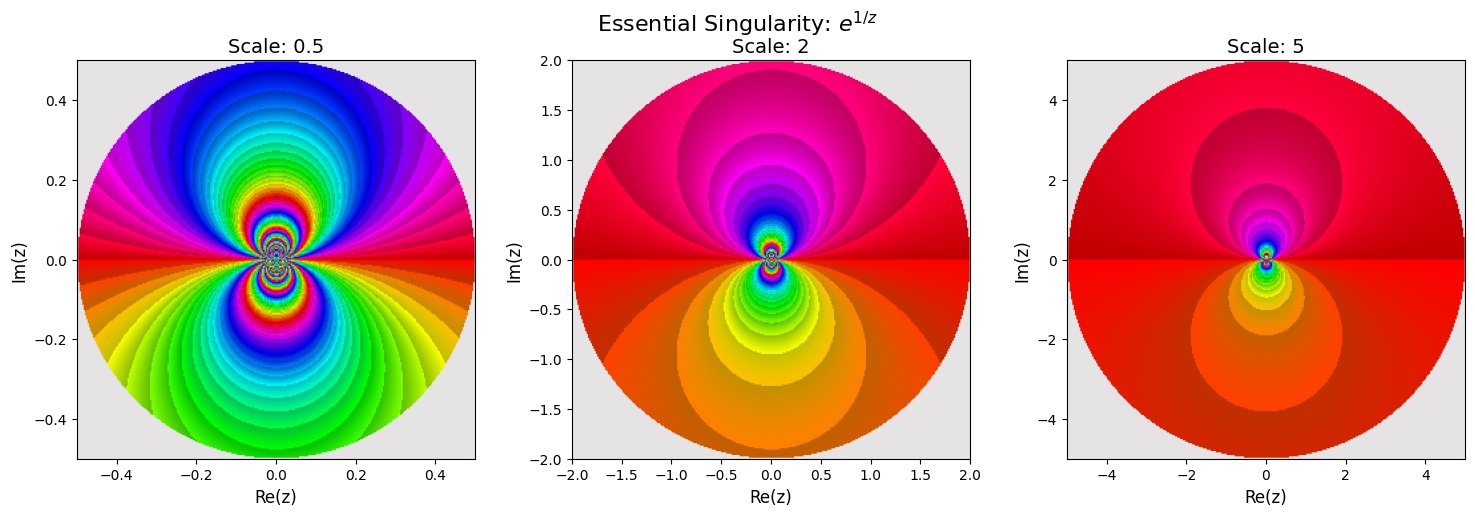

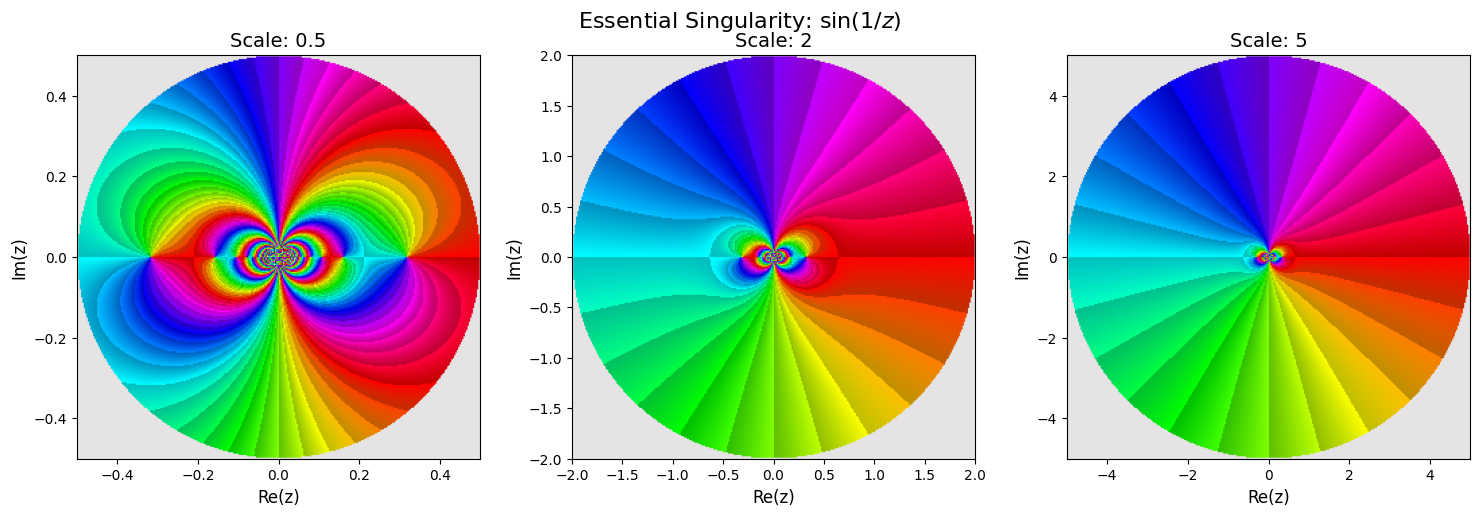

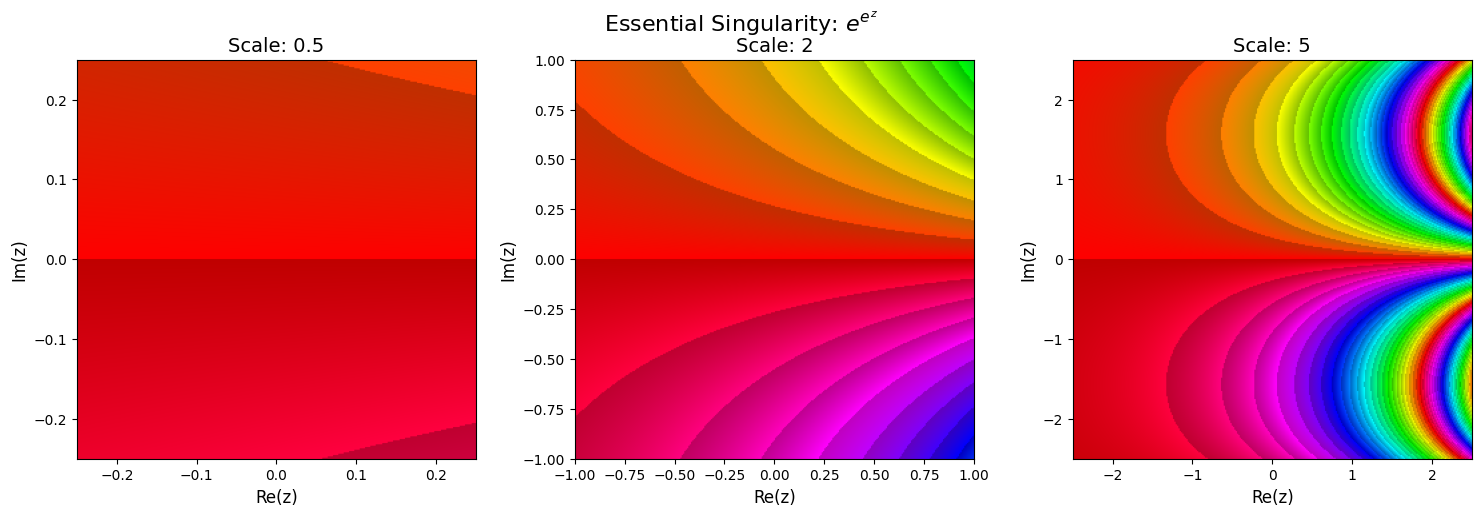

In [15]:
# Essential singularities
essential_funcs = [
    (lambda z: np.exp(1/z), r"$e^{1/z}$", 0),
    (lambda z: np.sin(1/z), r"$\sin(1/z)$", 0),
    (lambda z: np.exp(np.exp(z)), r"$e^{e^z}$", None)
]

for func, name, singularity in essential_funcs:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Different scales
    scales = [0.5, 2, 5]
    
    for ax, scale in zip(axes, scales):
        if singularity is not None:
            domain = cp.Disk(scale, center=singularity)
        else:
            domain = cp.Rectangle(scale, scale)
        
        cp.plot(domain, func, ax=ax,
                cmap=cp.Phase(n_phi=12), n=300)
        ax.set_title(f"Scale: {scale}")
    
    plt.suptitle(f"Essential Singularity: {name}", fontsize=16)
    plt.tight_layout()
    plt.show()

## Summary and Best Practices

### Choosing the Right Visualization

1. **Use `plot()` when**:
   - You need a quick visualization
   - Focusing on a specific region
   - Creating multi-panel comparisons

2. **Use `pair_plot()` when**:
   - Comparing domain and codomain
   - Understanding transformations
   - Teaching/explaining functions

3. **Use `riemann_chart()` when**:
   - Analyzing behavior near infinity
   - Understanding global properties
   - Working with rational functions

4. **Use 3D plots when**:
   - Visualizing modulus growth
   - Finding poles and zeros
   - Creating impressive visualizations

### Performance Tips

- **2D plots**: Use `n=300-400` for good quality
- **3D plots**: Use `n=200-200` (slower rendering)
- **Riemann sphere**: Use `n=300-400` (very slow above 500)
- **Saving figures**: Use high DPI (300) for publications

### Color Map Selection Guide

- **Phase portraits**: Universal, shows zeros/poles clearly
- **Enhanced phase**: Better for counting orders
- **Chessboards**: Great for conformal properties
- **LogRings**: Excellent for growth rates

### Next Steps

1. Experiment with your own functions
2. Combine multiple visualizations for deeper insight
3. Use the analysis templates provided here
4. Share your beautiful visualizations!

For more examples, see the [Gallery](../docs/gallery/README.md) and [Domains & Colormaps Tutorial](domains_and_colormaps_tutorial.ipynb).